# **1. Data Loading & Initial Exploration**

In this step, the dataset is loaded and an initial inspection is performed to understand its structure and key attributes.


In [18]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("content.csv")

# Preview first few rows to understand the data
df.head()

,content_id,content_type,language,genre,duration,release_date,rating,episode_count,season_count
0,cont_475_19_32,series,english,drama,4980000,2018-07-01,10,32,19
1,cont_2185_15_21,series,english,drama,3000000,2016-03-29,4,21,15
2,cont_4857_13_28,series,tamil,comedy,3120000,2006-03-06,8,28,13
3,cont_3340_1_5,sports,hindi,cricket,9900000,2009-01-10,0,5,1
4,cont_1664_10_29,series,hindi,action,3660000,2020-05-25,2,29,10


In [19]:
# Check dataset structure and data types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48645 entries, 0 to 48644
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   content_id     48645 non-null  object
 1   content_type   48645 non-null  object
 2   language       48645 non-null  object
 3   genre          48645 non-null  object
 4   duration       48645 non-null  int64 
 5   release_date   48645 non-null  object
 6   rating         48645 non-null  int64 
 7   episode_count  48645 non-null  int64 
 8   season_count   48645 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 3.3+ MB


# **2. Basic Data Cleaning**

Basic cleaning is performed to remove missing values and duplicate records to ensure reliable analysis.


In [20]:
# Remove rows with missing values to keep analysis clean
df.dropna(inplace=True)

# Remove duplicate records if any
df.drop_duplicates(inplace=True)


# **3. Dataset Overview**

This section provides a high-level understanding of how the dataset is distributed across languages and genres.


In [21]:
# View top languages by number of titles
df["language"].value_counts().head(10)




,count
language,
hindi,23912
english,9194
telugu,4781
tamil,2577
marathi,2465
malayalam,2415
gujarati,1179
kannada,810
punjabi,474


In [22]:
# View top genres by number of titles
df["genre"].value_counts().head(10)

,count
genre,
drama,22991
comedy,9713
action,6724
horror,2181
documentary,2118
cricket,1875
sci-fi,1631
football,659
basketball,311


# **4. Content Distribution by Language**

This visualization shows the number of titles available in each language.


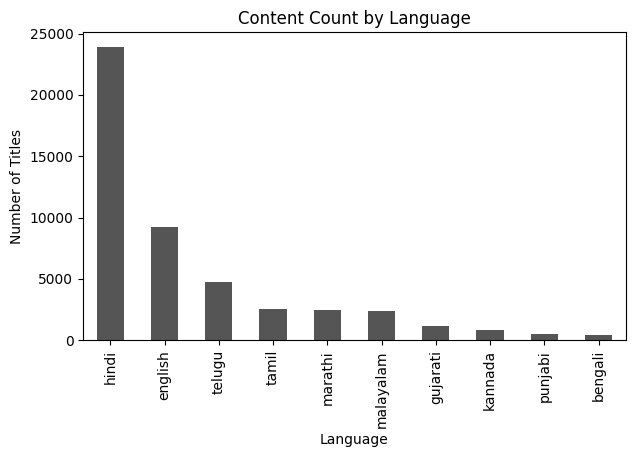

In [23]:
# Count number of titles per language
language_count = df["language"].value_counts().head(10)

# Plot bar chart for language-wise content count
language_count.plot(
    kind="bar",
    figsize=(7, 4),
    color="#555555"
)

# Add labels and title
plt.title("Content Count by Language")
plt.xlabel("Language")
plt.ylabel("Number of Titles")

# Display the plot
plt.show()


# **5. Average Rating by Language**

This graph compares the average user ratings across different languages.


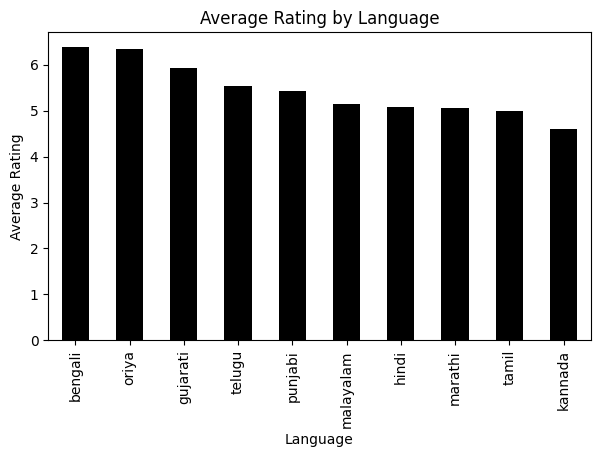

In [24]:
# Calculate average rating for each language
avg_rating_language = (
    df.groupby("language")["rating"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

# Plot average rating by language
avg_rating_language.plot(
    kind="bar",
    figsize=(7, 4),
    color="#000000"
)

# Add labels and title
plt.title("Average Rating by Language")
plt.xlabel("Language")
plt.ylabel("Average Rating")

# Display the plot
plt.show()


# **6. Content Distribution by Genre**

This visualization highlights the most common genres available in the dataset.


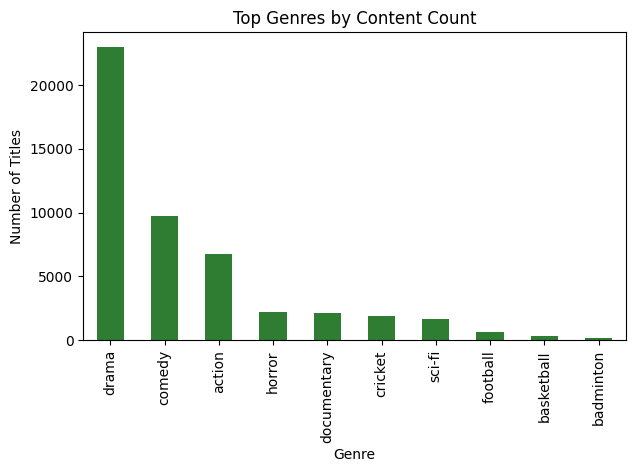

In [29]:
# Count number of titles for each genre
genre_count = df["genre"].value_counts().head(10)

# Plot bar chart for genre-wise content count
genre_count.plot(kind="bar",figsize=(7, 4),color="#2E7D32"
)
# Add labels and title
plt.title("Top Genres by Content Count")
plt.xlabel("Genre")
plt.ylabel("Number of Titles")
# Display the plot
plt.show()

# **7. Genre Share Across Platform (Percentage View)**

This visualization shows the percentage contribution of each major genre across the entire content catalog.


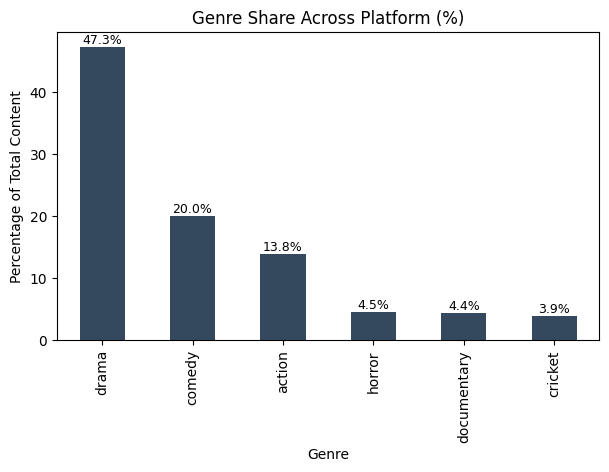

In [34]:
# Calculate percentage share of top genres
genre_percentage = (
    df["genre"]
    .value_counts(normalize=True)
    .head(6) * 100
)

# Plot percentage bar chart
ax = genre_percentage.plot(
    kind="bar",
    figsize=(7, 4),
    color="#34495E"
)

# Add labels and title
plt.title("Genre Share Across Platform (%)")
plt.xlabel("Genre")
plt.ylabel("Percentage of Total Content")

# Add percentage labels on top of each bar
for i, value in enumerate(genre_percentage):
    ax.text(
        i,
        value + 0.5,              # slight gap above bar
        f"{value:.1f}%",          # format to 1 decimal
        ha="center",
        fontsize=9
    )

# Display the plot
plt.show()


# **8. Key Insights**

- Content availability varies significantly across languages and genres.
- Some languages have fewer titles but higher average ratings, indicating stronger audience preference.
- Genre distribution shows clear dominance of certain categories.


# **9. Conclusion**

This project demonstrates a structured data visualization workflow, including dataset understanding, metric calculation, and clear visual communication of insights using Python.
